# Used Car Price Analysis

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model


### 1) Problem statement.

- This dataset comprises used cars sold in India as well as important features of these cars.
- If user can analyse the price of the car based on input features.
- Prediction results can be used to give new seller the price suggestion based on market condition.

### 2) Data Collection.

- The Dataset is collected from scrapping from kaggle webiste
- The data consists of 13 column and 8128 rows.

### 2.1 Import Data and Required Packages

##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
df = pd.read_csv("Car details.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


#### Show Top 5 Records

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


 #### Shape of the dataset

In [4]:
df.shape

(8128, 13)

#### Check Datatypes in the dataset

In [3]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB



#### Summary of the dataset

In [4]:
# Display summary statistics for a dataframe
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## Data cleaning

In [5]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

#### Insights:
- From above we can see mileage,engine,max_power,torque and seats having null values.

## Null value Percentage :


In [6]:
col_name=['mileage','engine','max_power','torque','seats']
(df[col_name].isnull().sum()/len(df))*100


mileage      2.718996
engine       2.718996
max_power    2.645177
torque       2.731299
seats        2.718996
dtype: float64

#### Insights:

- From above we can see 2 to 3% of null values are present in dataset.
- So we can drop those null values as it wont effect distribution of respective columns.


### Droping null values

In [7]:
df.dropna(inplace=True)

In [8]:
(df[col_name].isnull().sum()/len(df))*100

mileage      0.0
engine       0.0
max_power    0.0
torque       0.0
seats        0.0
dtype: float64

- From above we can see null values are dropped

### Converting year column into Datetime format

In [9]:
# Converting Year columns into datetime format
df["year"] = pd.to_datetime(df["year"])


#### Insights:

- Year column converted into date time format so we can easily get insights from that column.

## 3. EXPLORING DATA

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['year', 'selling_price', 'km_driven', 'seats']

We have 9 categorical features : ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']


## Feature Information

- name: Car's Full name, which includes brand and specific model name.
- year: year of the car of a particular brand.
- seller_type: Which Type of seller is selling the used car
- fuel: Fuel used in the used car, which was put up on sale.
- transmission: Transmission used in the used car, which was put on sale.
- mileage: It is the number of kilometer the car runs per litre.
- engine: It is the engine capacity in cc(cubic centimeters)
- max_power: Max power it produces in BHP.
- seats: Total number of seats in car.
- selling_price: The sale price which was put up on website.

In [4]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Maruti Swift Dzire VDI                             1.587106
Maruti Alto 800 LXI                                1.008858
Maruti Alto LXi                                    0.873524
BMW X4 M Sport X xDrive20d                         0.762795
Maruti Swift VDI                                   0.750492
                                                     ...   
Skoda Fabia 1.4 TDI Ambiente                       0.012303
Mahindra Scorpio VLX 2WD AT BSIII                  0.012303
Renault KWID Climber 1.0 AMT                       0.012303
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV    0.012303
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV       0.012303
Name: name, Length: 2058, dtype: float64
---------------------------
Diesel    54.158465
Petrol    44.672736
CNG        0.701280
LPG        0.467520
Name: fuel, dtype: float64
---------------------------
Individual          83.243110
Dealer              13.853346
Trustmark Dealer     2.903543
Name: seller_type, dtype: float64
------------

## Univariate Analysis

- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysisis to understand the distribution of values for a single variable.



### Numerical Features

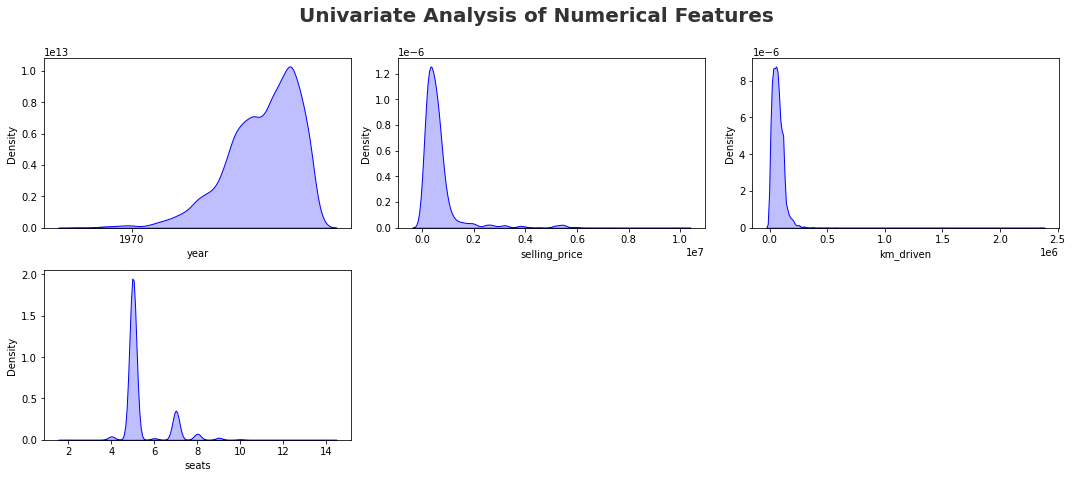

In [11]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Report

- Km_driven, selling_price are right skewed and postively skewed.
- Outliers in km_driven ,selling_price.



### Categorical Features

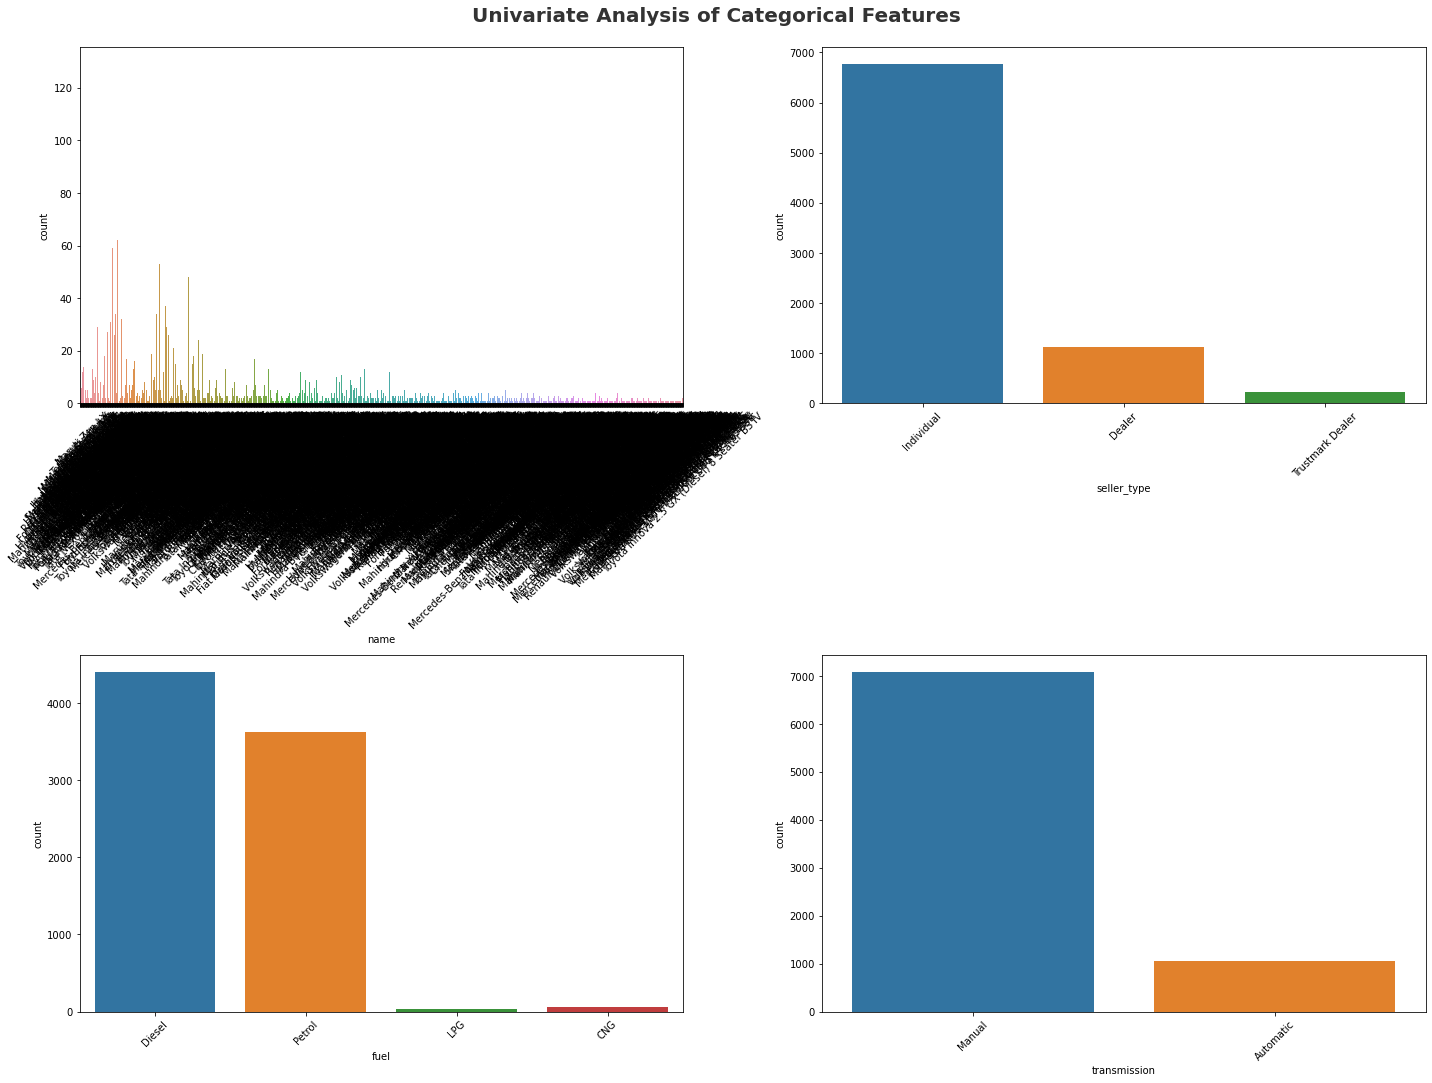

In [16]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'name', 'seller_type', 'fuel', 'transmission']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Checking Null Values

In [18]:
##Checking Null Values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

## Bivariate Analysis


  - Bivariate analysis is the analysis between two variable.


In [19]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['year', 'selling_price', 'km_driven', 'seats']


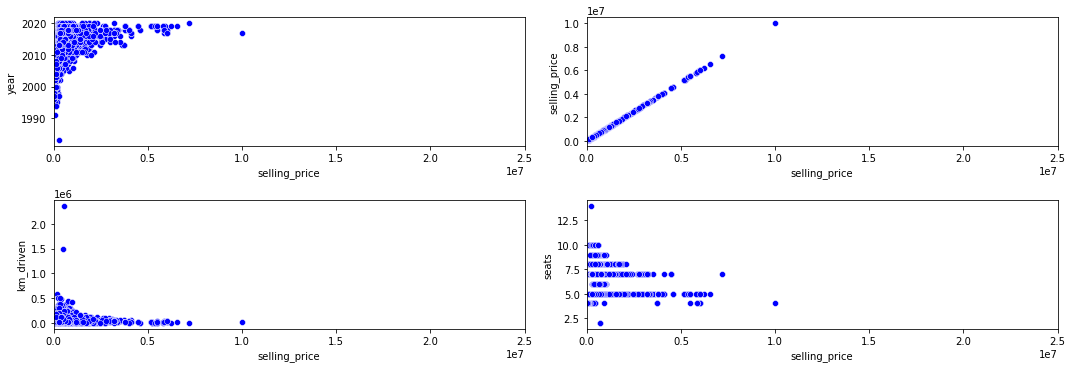

In [20]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continues_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

## Initial Analysis Report

#### Report

- Lower Vehicle age has more selling price than Vehicle with more age.
- Kms Driven has negative effect on selling price.
- 5 to 7 seater cars have high selling price.

## 4. Visualization

### 4.1 Visualize the Target Feature

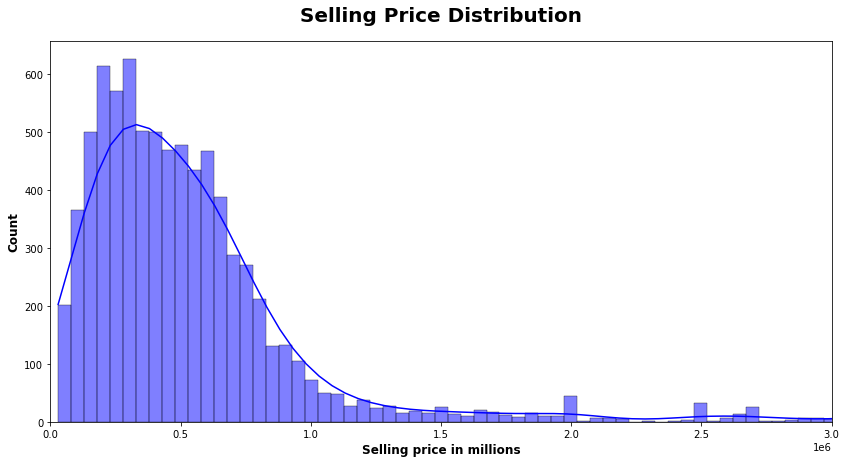

In [21]:
plt.subplots(figsize=(14,7))
sns.histplot(df.selling_price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

- From the chart it is clear that the Target Variable Skewed


### 4.2 Most Selling car in Used car list?

In [22]:
df.name.value_counts()[0:10]

Maruti Swift Dzire VDI        129
Maruti Alto 800 LXI            82
Maruti Alto LXi                71
BMW X4 M Sport X xDrive20d     62
Maruti Swift VDI               61
Maruti Swift VDI BSIV          59
Maruti Wagon R LXI             53
Maruti Alto K10 VXI            50
Hyundai EON Era Plus           48
Maruti Wagon R VXI BS IV       45
Name: name, dtype: int64



### - Most Selling Used Car is Maruti Swift Dzire VDI




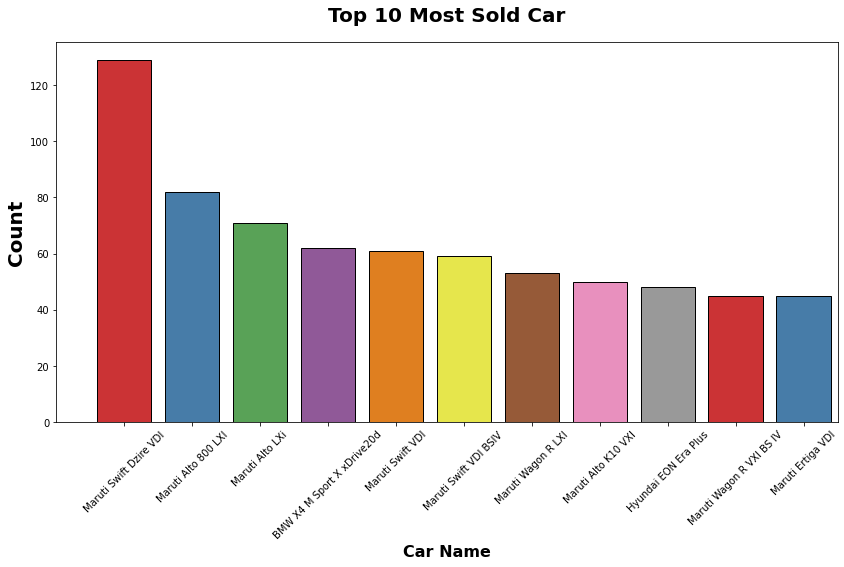

In [23]:
plt.subplots(figsize=(14,7))
sns.countplot(x="name", data=df,ec = "black",palette="Set1",order = df['name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()  


## Check mean price of Maruti Swift Dzire VDI which is most sold

In [24]:
Dzire = df[df['name'] == 'Maruti Swift Dzire VDI']['selling_price'].mean()
print(f'The mean price of Maruti Swift Dzire VDI is {Dzire:.2f} Rupees')

The mean price of Maruti Swift Dzire VDI is 578658.86 Rupees


#### Report:

- As per the Chart these are top 10 most selling cars in used car list.
- Mean Price of Most Sold Car is 5.7 lakhs.
- This Feature has impact on the Target Variable.


### Most selling cars name

In [25]:
df.name.value_counts()[0:10]

Maruti Swift Dzire VDI        129
Maruti Alto 800 LXI            82
Maruti Alto LXi                71
BMW X4 M Sport X xDrive20d     62
Maruti Swift VDI               61
Maruti Swift VDI BSIV          59
Maruti Wagon R LXI             53
Maruti Alto K10 VXI            50
Hyundai EON Era Plus           48
Maruti Wagon R VXI BS IV       45
Name: name, dtype: int64

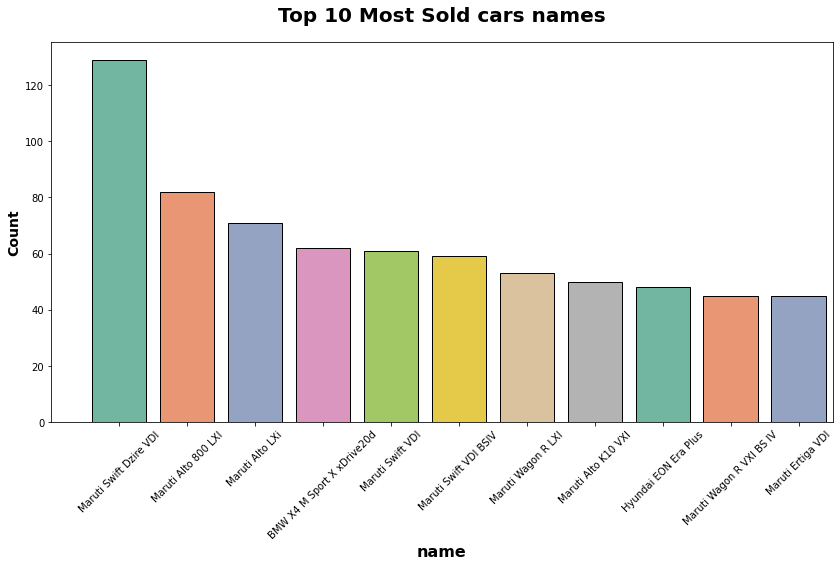

In [26]:
plt.subplots(figsize=(14,7))
sns.countplot(x="name", data=df,ec = "black",palette="Set2",order = df['name'].value_counts().index)
plt.title("Top 10 Most Sold cars names", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [27]:
Maruti = df[df['name'] == 'Maruti Swift Dzire VDI']['selling_price'].mean()
print(f'The mean price of Maruti is {Maruti:.2f} Rupees')

The mean price of Maruti is 578658.86 Rupees


## Costliest Brand and Costliest Car

In [28]:
brand = df.groupby('name').selling_price.max()
brand_df = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]
brand_df

,selling_price
name,
Volvo XC90 T8 Excellence BSIV,10000000
BMW X7 xDrive 30d DPE,7200000
Audi A6 35 TFSI Matrix,6523000
BMW 6 Series GT 630d Luxury Line,6000000
Mercedes-Benz S-Class S 350 CDI,6000000
BMW X4 M Sport X xDrive20d,5800000
Volvo XC60 Inscription D5 BSIV,5500000
Volvo S90 D4 Inscription BSIV,5500000
Mercedes-Benz E-Class Exclusive E 200 BSIV,5200000


### Report:

- Costliest Brand sold is volvo at 1 Crores.
- Second most costliest car Brand is BMW as 72 lakhs.
- Brand name has very clear impact on selling price.


## Kilometer driven vs Selling Price

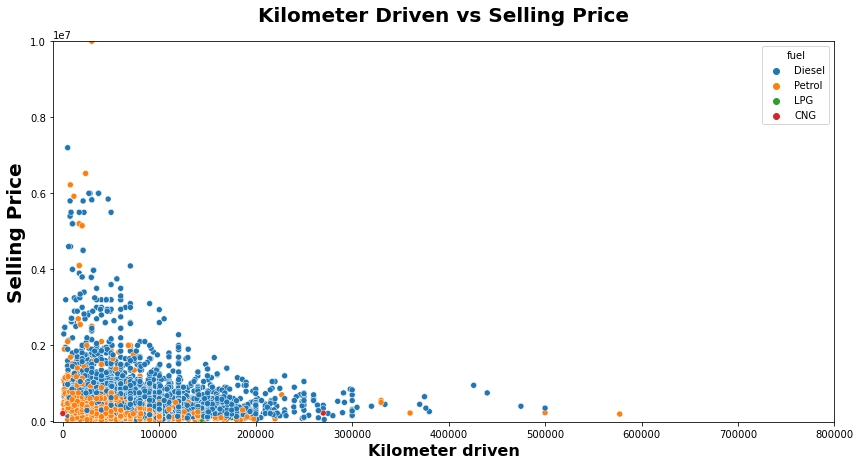

In [34]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y='selling_price', data=df,ec = "white",color='b', hue='fuel')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

#### Report

- Many Cars were sold with kms between 0 to 10k Kilometers
- Low Kms driven cars had more selling price compared to cars which had more kms driven.

## Fuel Type Selling Price

In [35]:
fuel = df.groupby('fuel')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel,
Diesel,550000.0
Petrol,345000.0
CNG,320000.0
LPG,195500.0


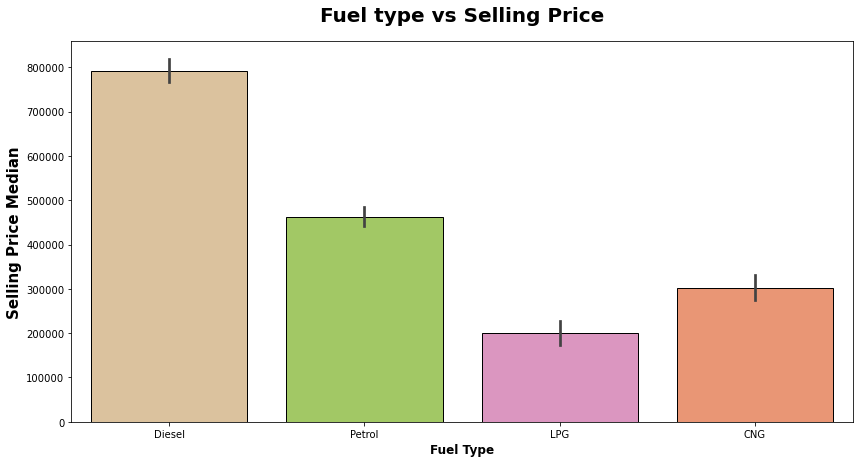

In [36]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df.fuel, y=df.selling_price, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price Median", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

#### Report

- Diesel cars have highers selling average price.
- Followed by Petrol,LPG and CNG.
- Fuel Type is also important feature for the Target variable.


## Most sold Fuel type

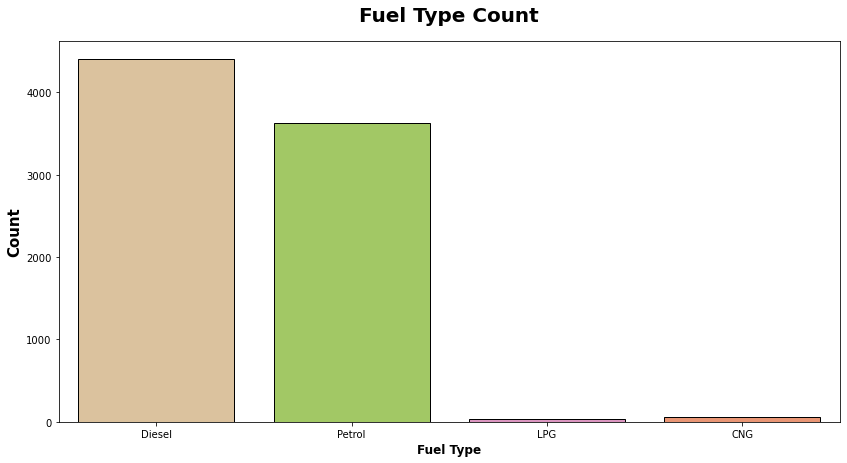

In [37]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.fuel, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()


### Report

- Petrol and Diesel dominate the used car market in the list.
- The most sold fuel type Vechicle is Diesel.
- Followed by petrol and CNG and least sold is LPG


## Mileage vs Selling Price

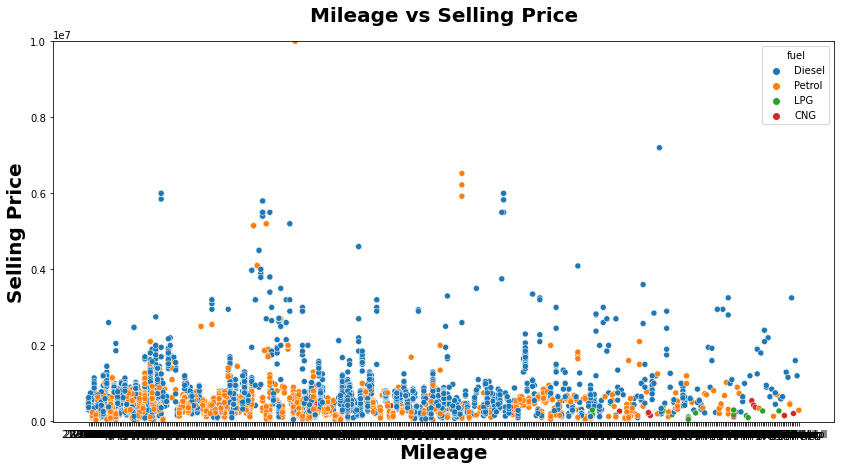

In [38]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="mileage", y='selling_price', data=df,ec = "white",color='b', hue='fuel')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=20)
plt.show()

### Report:

- As the mileage increasing selling price is also increasing for the most of the cars

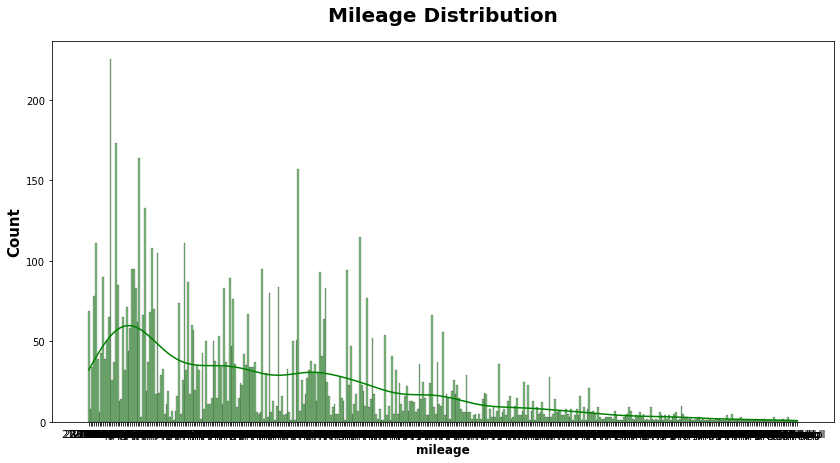

In [39]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.mileage, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("mileage", weight="bold", fontsize=12)
plt.show()

### Report:

- By observing the above plot Most of the selling cars are giving 12kmpl to 22kmpl 

## Vehicle year vs Selling Price

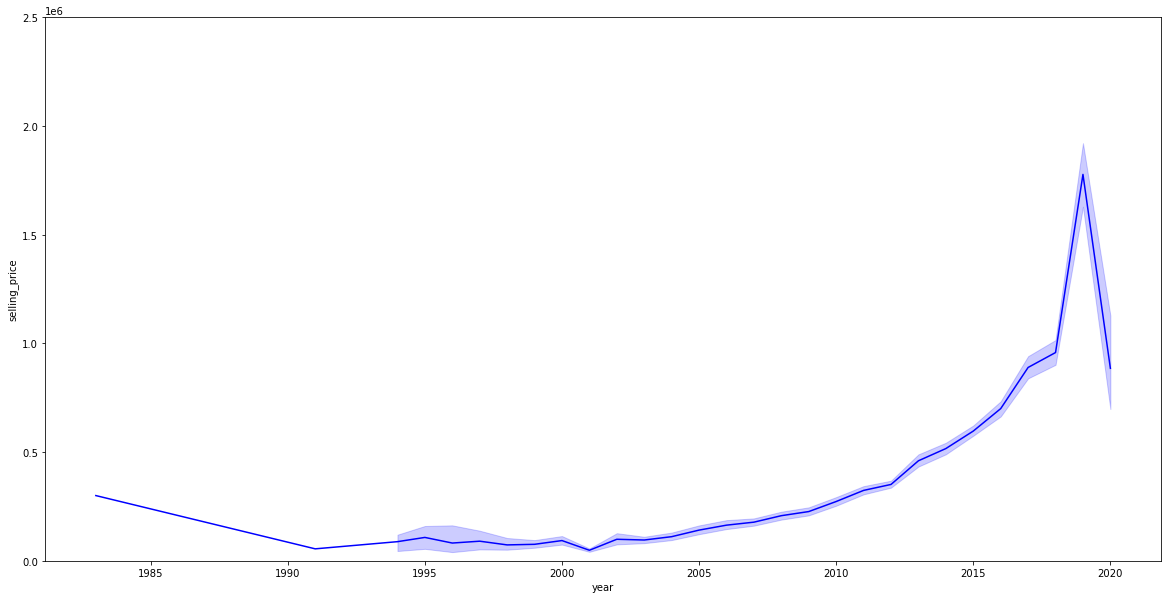

In [40]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='year',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

### Report

- As the Vehicle age increases the price also get reduced.
- Vehicle age has Negative impact on selling price


## Transmission Type

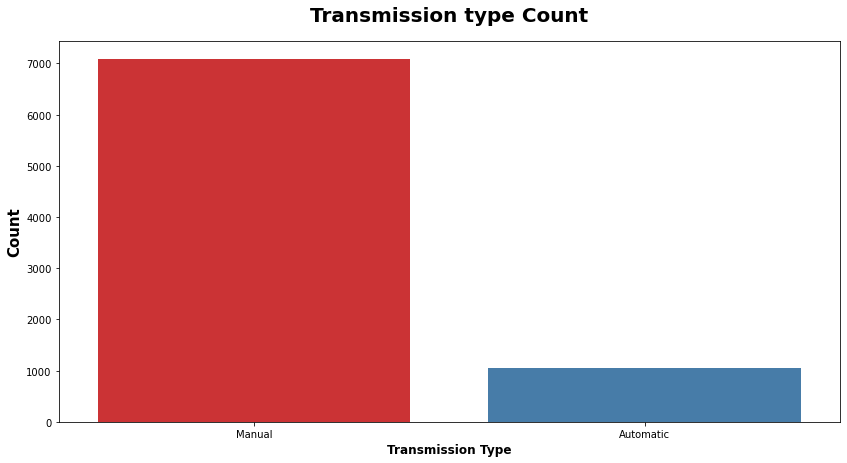

In [41]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission', data=df,palette="Set1")
plt.title("Transmission type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

### Report:

- Manual Transmission was found in most of the cars which was sold.

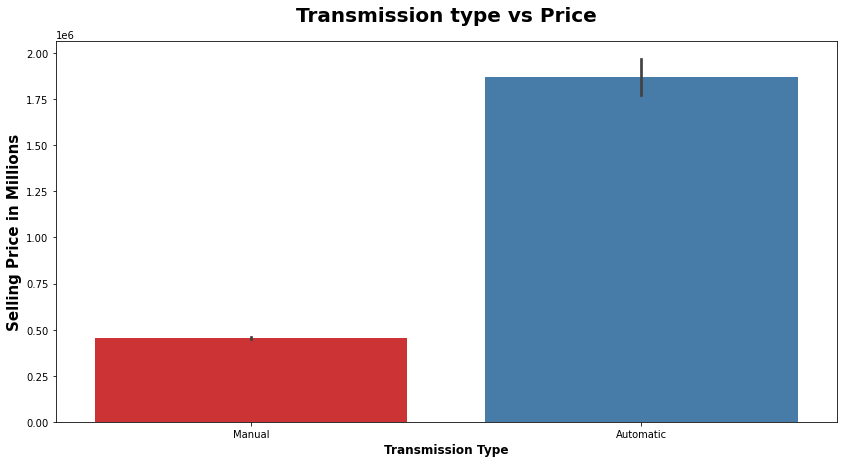

In [42]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission', y='selling_price', data=df,palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 


### Report

- Manual Transmission was found in most of the cars which was sold.
- Automatic cars have more selling price than manual cars.


## Seller Type

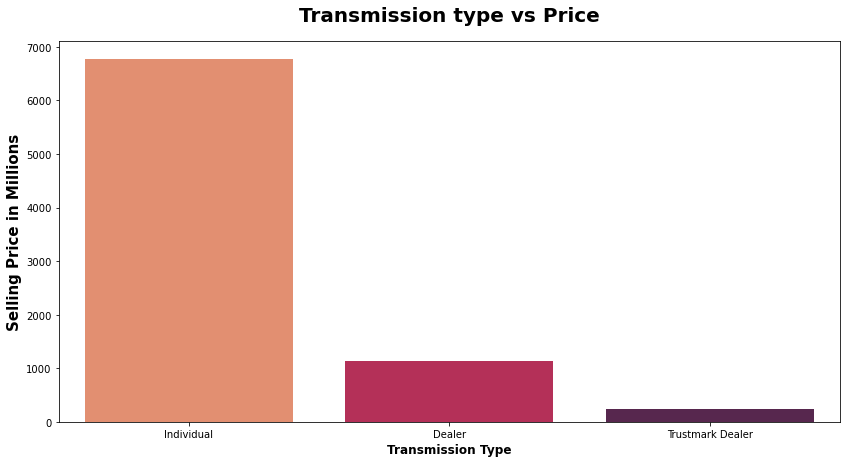

In [43]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type', data=df,palette="rocket_r")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

In [44]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,690000.0
Trustmark Dealer,650000.0
Individual,400000.0


### Report

- Individual have put more ads on used car list.
- Individual have put approx 6800 ads with median selling price of 4.0 Lakhs.
- Followed by Dealer with approx 1200 ads with median selling price of 6.9 Lakhs.
- dealer have more median selling price than Individual.

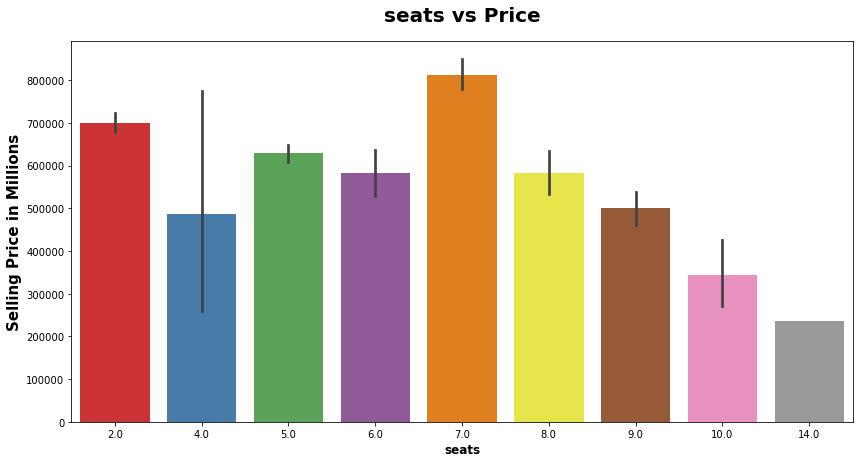

In [45]:
plt.subplots(figsize=(14,7))
sns.barplot(x='seats', y='selling_price', data=df,palette="Set1")
plt.title("seats vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("seats", weight="bold", fontsize=12)
plt.show() 


### Report

- 7 and 2 seater cars have high selling price.
- As the seats are increasing selling price decreasing.







# Multivariate Analysis




- Multivariate analysis is the analysis of more than one variable.



### Check Multicollinearity in Numerical features

In [6]:
df[(list(df.columns)[1:])].corr()

,year,selling_price,km_driven,seats
year,1.000000,0.414092,-0.418006,-0.009144
selling_price,0.414092,1.000000,-0.225534,0.041358
km_driven,-0.418006,-0.225534,1.000000,0.227336
seats,-0.009144,0.041358,0.227336,1.000000


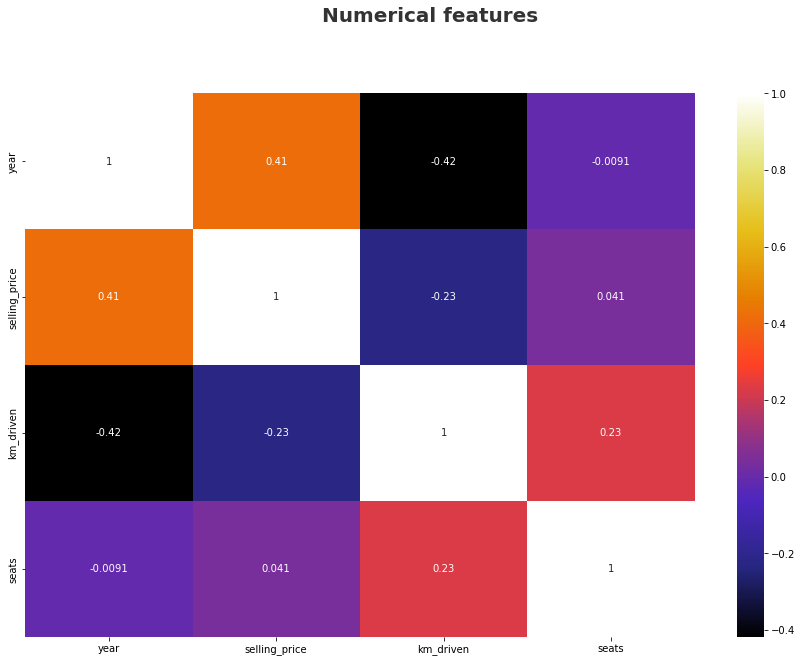

In [10]:
plt.figure(figsize = (15,10))
plt.suptitle('Numerical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

### Check Multicollinearity for Categorical features


- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test         statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e Selling Price

In [8]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['selling_price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,name,Reject Null Hypothesis
1,fuel,Reject Null Hypothesis
2,seller_type,Reject Null Hypothesis
3,transmission,Reject Null Hypothesis
4,owner,Reject Null Hypothesis
5,mileage,Reject Null Hypothesis
6,engine,Reject Null Hypothesis
7,max_power,Reject Null Hypothesis
8,torque,Reject Null Hypothesis


### Pair plot

- A pair plot creates a grid of scatter plots to compare the distribution of pairs of numeric variables. It also features a       histogram for each feature in the diagonal boxes.

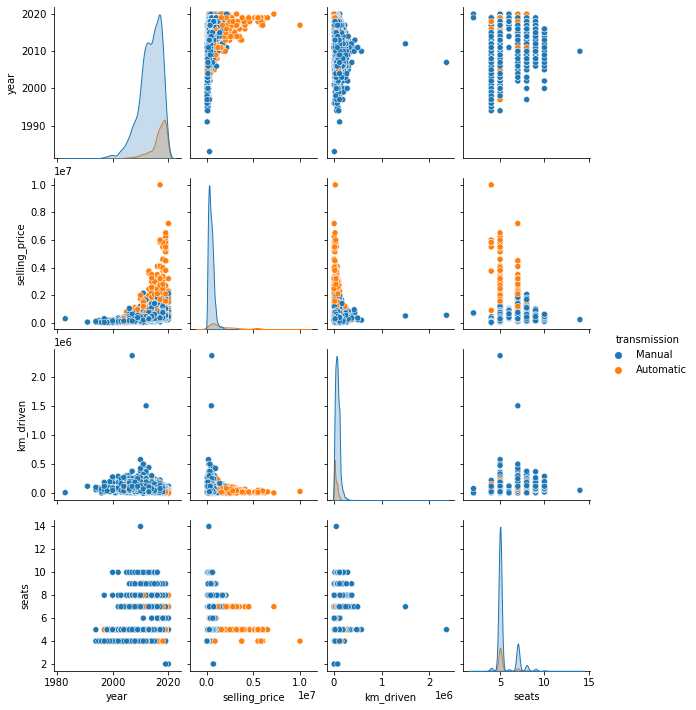

In [33]:
sns.pairplot(
    df[(list[ 'name', 'seller_type', 'fuel', 'transmission'])], 
    aspect=.85,
    hue='transmission');

### Insights:

- Diesel cars have highers selling average price.
- Followed by Petrol,LPG and CNG.
- Fuel Type is also important feature for the Target variable.
- Many Cars were sold with kms between 0 to 10k Kilometers
- Low Kms driven cars had more selling price compared to cars which had more kms driven.

## Scatter plot

- A scatter plot shows the relationship between two numeric features by using dots to visualize how these variables move together.



#### Let us visualize the selling price with the km_driven of the vehicle.

Text(0, 0.5, 'km_driven')

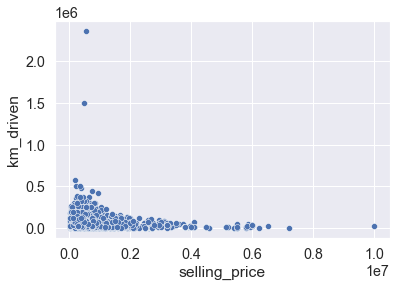

In [39]:
sns.set(font_scale=1.3)
sns.scatterplot(
    x='selling_price', 
    y='km_driven', 
    data=df)
plt.xlabel(
    'selling_price')
plt.ylabel(
    'km_driven')

### Insights:

- Low Kms driven cars had more selling price compared to cars which had more kms driven.



### We can further segment the scatter plot by a categorical variable using hue:

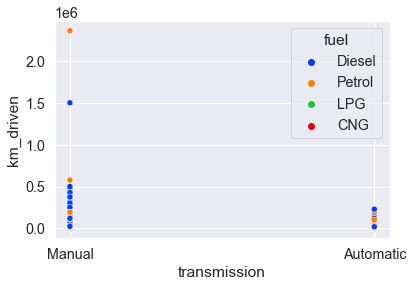

In [43]:
sns.scatterplot(
    x='transmission',
    y='km_driven', 
    data=df,
    palette='bright',
    hue='fuel');

### Insights:

- Most of the cars sold is manual transmission.
- petrol cars are sold after driving many kilometres than other.

## relplot

 ### The plot below splits the data by the transmission categories into different plots.

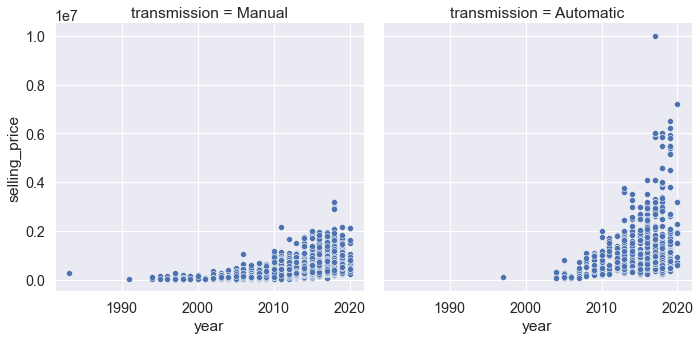

In [47]:
sns.relplot(
    x='year', 
    y='selling_price', 
    data=df, 
    kind='scatter', 
    col='transmission');

### Insights:

- As the age of the car increasing then the selling price of car decreasing from above plots in both the transmissions.

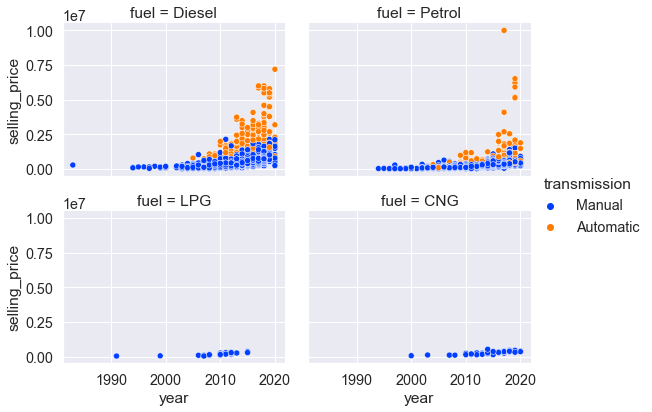

In [48]:
sns.relplot(
    x='year', 
    y='selling_price', 
    data=df,
    palette='bright',
    height=3, aspect=1.3,
    kind='scatter', 
    hue='transmission',
    col='fuel',
    col_wrap=2);

### Insights:

- Most of the manual transmissions cars are used diesel and their selling price is low as compared to automatic transmission cars.
- we can see automatic cars are launched between 2010 and 2020 and their selling price is also high compared to manual.
- most of the cars sold is diesel and petrol.

### lmplot

- The lmplot is the figure-level version of a regplot that draws a scatter plot with a regression line onto a Facet grid. It does not have a kind parameter.

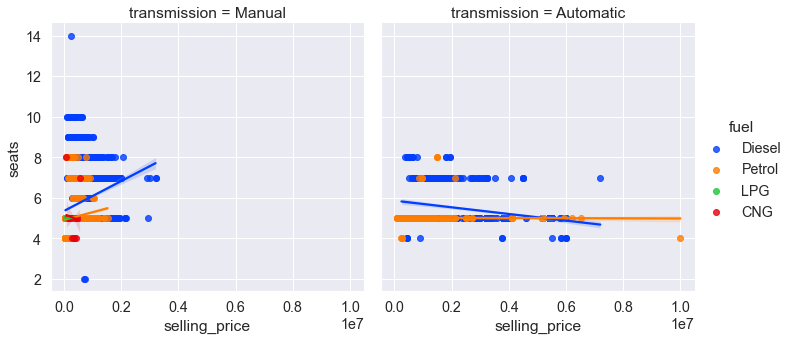

In [52]:
sns.lmplot(
    x="selling_price", 
    y="seats", 
    data=df,
    palette='bright',
    col="transmission", 
    hue="fuel");

### Insights:

- Manual transmission cars are having more number of seats than compared to automatic transmission.
- cars containing 8 to 10 seats are having high selling price in manual transmission.
- cars containing 4 to 6 seats are having high selling price in automatic transmission.

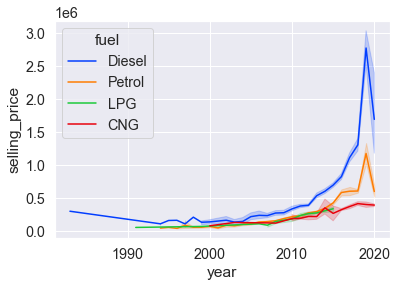

In [53]:
sns.lineplot(
    x="year", 
    y="selling_price",
    data=df,
    palette='bright',
    hue='fuel');

### Insights:

- we can see 2018 to 2020 year cars are sold mostly containing diesel fuel and their selling price is also high .
- cars age is inversly proportional to selling price.

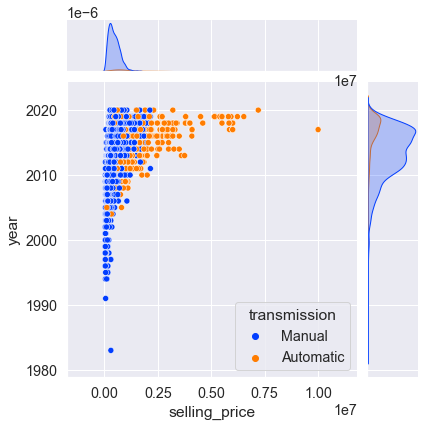

In [56]:
sns.jointplot(
    x='selling_price', 
    y='year', 
    data=df,  
    palette='bright',
    hue='transmission');

### catplot 
   
 - A catplot or categorical plot, uses the kind parameter to specify what categorical plot to draw with options being ‘strip’(default), ’swarm’, ‘box’, ‘violin’, ‘boxen’, ‘point’ and ‘bar’.

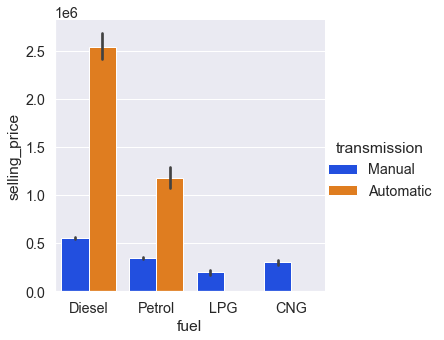

In [60]:
sns.catplot(
    x='fuel', 
    y='selling_price', 
    data=df,
    palette='bright',
    kind='bar',
    hue='transmission');

### Insights:

- Automatic transmission cars are having high selling price containing diesel fuel and petrol fuel .
- we can see LPG and CNG fuel are not used in automatic cars.

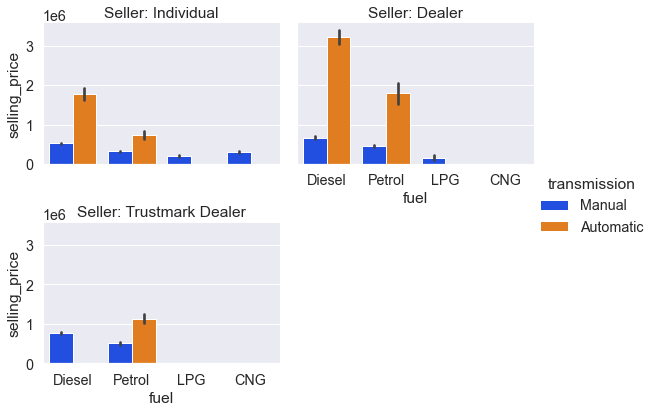

In [61]:
g = sns.catplot(
        x='fuel', 
        y='selling_price', 
        data=df,
        palette='bright',
        height=3, aspect=1.3,
        kind='bar',
        hue='transmission', 
        col ='seller_type',
        col_wrap=2)
g.set_titles(
    'Seller: {col_name}');

### Insights:

- we can see most of the automatic transmissions cars are sold by dealers are containing diesel fuel compared to other fuels.
- Now a days is no one taking risk to sale cars by own. every one is giving to dealer so that their car can be sold fastly for better price.

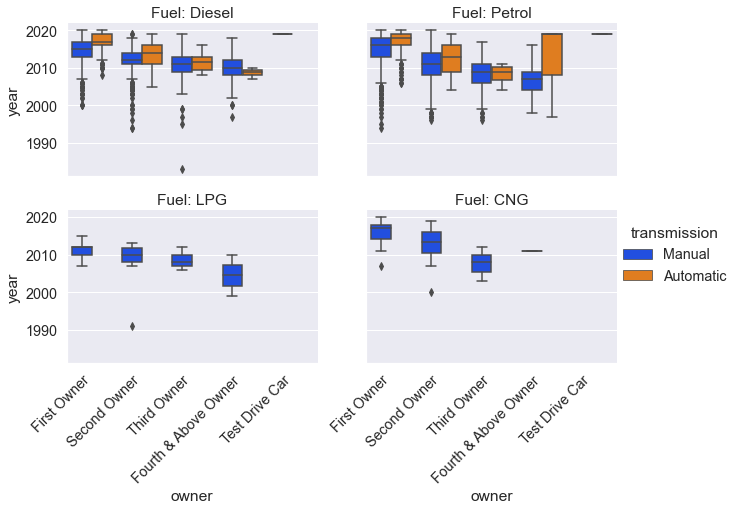

In [62]:
g = sns.catplot(
        x='owner', 
        y='year', 
        data=df,
        palette='bright',
        height=3, aspect=1.5,
        kind='box', 
        hue='transmission', 
        col='fuel',
        col_wrap=2)
g.set_titles(
    'Fuel: {col_name}');
g.set_xticklabels(
    rotation=45, ha='right')

### Insights:

- Most of the cars are sold by first owner having automatic transmission than manual transmission.
- we can see 2010 to 2020 year cars are sold highly by first owner.

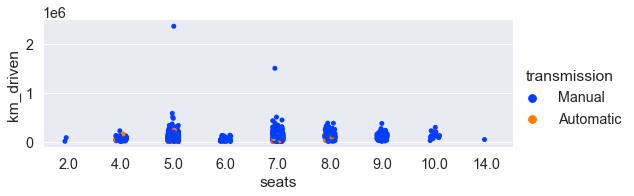

In [63]:
sns.catplot(
    x='seats', 
    y='km_driven', 
    data=df, 
    palette='bright', 
    height=3,
    aspect=2.5,
    # dodge=True,
    kind='strip',
    hue='transmission');

### Insights:
 - 7 seater cars having manual transmission sold mostly than other cars.
 - 5 seater cars having manual transmission are driven more kilometres.

## Conclusion :-

- So, by above univariate,bivariate and Multivariate analysis we can see above features are playing important role in deciding resale price of car which we can use in for my model building.
- We first created matrix plots that visualized relationships in a grid to identify numeric variables with high correlations. We then used different axes-level and figure-level functions to create charts that explored the relationships between the numeric and categorical columns.
- The selling_price column is the target to predict. i.e Regression Problem.
- Dealers are the highest sellers of the used cars.
- Vehicle age has negative impact on the price.
- Manual cars are mostly sold and automatic has higher selling average than manual cars.
- diesel is the most preffered choice of fuel in used cars list, followed by diesel,LPG and CNG.
- we have used regression analysis and have predicted the selling price of the car based on various features of the cars.

